In [35]:
import matplotlib.pyplot as plt
%matplotlib nbagg

In [85]:
import datetime as dt
import json
from pprint import pformat

import requests


REQUEST_URL = 'https://uvdata.arpansa.gov.au/api/uvlevel/?longitude={lon:.2f}&latitude={lat:.2f}&date={date}'


def unzip(graph_data_series):
    dates = []
    forecast = []
    observed = []
    for item in graph_data_series:
        dates.append(dt.datetime.strptime(item['Date'], '%Y-%m-%d %H:%M'))
        forecast.append(item['Forecast'])
        observed.append(item['Measured'])
    return {
        'dates': dates,
        'forecast': forecast,
        'observed': observed
    }
    
    
def uvlevel(lon, lat, date=None):
    if date is None:
        date = dt.datetime.today()
    if not isinstance(date, str):
        date = date.strftime('%Y-%m-%d')
    datasource = json.loads(requests.get(REQUEST_URL.format(lon=lon, lat=lat, date=date)).text)
    data = unzip(datasource['GraphData'])
    data['datasource'] = datasource
    return data


def intervals(mins, start=dt.time(7), end=dt.time(20), date=None):
    if date is None:
        date = dt.date.today()
    elif isinstance(date, str):
        date = dt.datetime.strptime(date, '%Y-%m-%d')
    datetimes = [dt.datetime.combine(date, start)]
    while datetimes[-1] < dt.datetime.combine(date, end):
        datetimes.append(datetimes[-1] + timedelta(minutes=mins))
    return datetimes


def filter_by_interval(data, *args, **kwargs):
    indices = [i for i in range(len(data['dates'])) if data['dates'][i] in intervals(*args, **kwargs)]
    return {
        'dates': [data['dates'][i] for i in indices],
        'observed': [data['observed'][i] for i in indices],
        'forecast': [data['forecast'][i] for i in indices],
        'datasource': data['datasource']
    }


def lambda_handler(event, context):
    
    data = uvlevel(138.62, -34.92)
    
    return pformat(data)


<IPython.core.display.Javascript object>


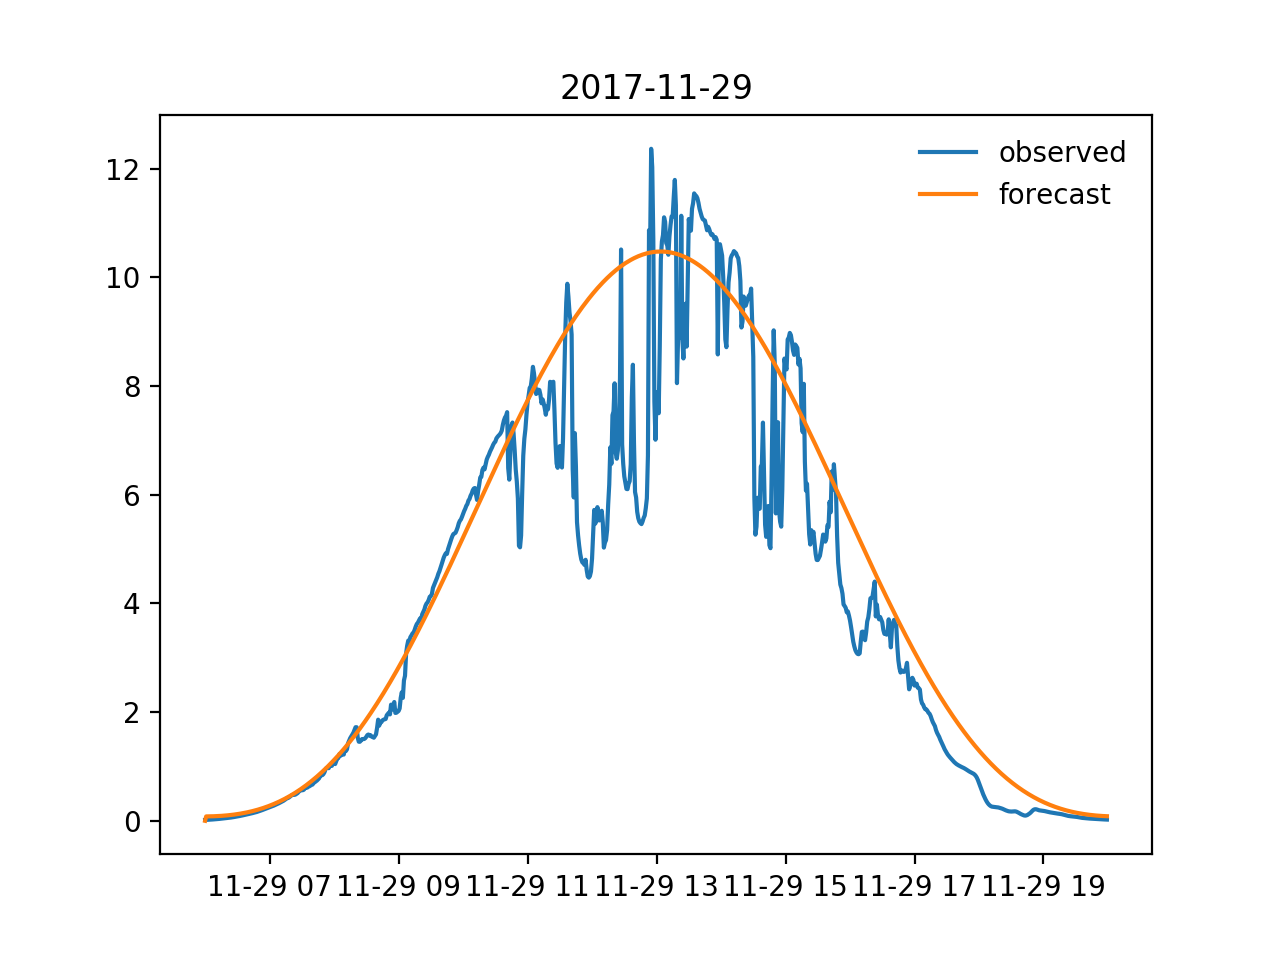

Text(0.5,1,'2017-11-29')

In [86]:
date = '2017-11-29'
data = uvlevel(138.62, -34.92, date=date)
fig = plt.figure()
plt.plot(data['dates'], data['observed'], label='observed')
plt.plot(data['dates'], data['forecast'], label='forecast')
plt.legend(loc='best', frameon=False)
plt.gca().set_title(date)

In [2]:
lambda_handler({}, {})

"{'datasource': {'$id': '1',\n                'CurrentDateTime': '07-10-2018 19:17',\n                'CurrentUVIndex': '0.0',\n                'GraphData': [{'$id': '2',\n                               'Date': '2018-10-07 06:00',\n                               'Forecast': None,\n                               'Measured': 0.009021648},\n                              {'$id': '3',\n                               'Date': '2018-10-07 06:01',\n                               'Forecast': None,\n                               'Measured': 0.009021648},\n                              {'$id': '4',\n                               'Date': '2018-10-07 06:02',\n                               'Forecast': None,\n                               'Measured': 0.009015514},\n                              {'$id': '5',\n                               'Date': '2018-10-07 06:03',\n                               'Forecast': None,\n                               'Measured': 0.009031598},\n                        